#**Kelompok Enterprise Data Management [EDM]​**
##Final Project DS Batch 29
#**TOKOTRONIC SHIPPING​**

Anggota:

1. Arbi Indrawan​
2. Syafira Rizka Kurniawati​
3. Irena Chandra​
4. Denilson Pasaribu​
5. Intan Furqona T​risnaningrum
6. Elprida Agustina​
7. Nur Purwanto​
8. Arif Ibrahim​ Ginanjar

**Dataset : [Ecommerce Shipping Data](https://www.kaggle.com/datasets/prachi13/customer-analytics)**

*Data Description*<br>

**ID**: ID Number of Customers.<br>
**Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,F.<br>
**Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.<br>
**Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.<br>
**Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).<br>
**Cost of the product**: Cost of the Product in US Dollars.<br>
**Prior purchases**: The Number of Prior Purchase.<br>
**Product importance**: The company has categorized the product in the various parameter such as low, medium, high.<br>
**Gender**: Male and Female.<br>
**Discount offered**: Discount offered on that specific product.<br>
**Weight in gms**: It is the weight in grams.<br>
**Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

---

# <b> 1. LOAD DATASET

## <i> A. Import Library

In [ ]:
#Lib for dataframe, agg, and data viz
from IPython import display
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 0
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_theme(style="whitegrid")
import numpy as np
from textwrap import wrap
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#lib for preprocessing
# Library for Scalling Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import boxcox
import warnings
# Library for Split Data
from sklearn.model_selection import train_test_split
# Library for Z-Score
from scipy import stats

# Import Library

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate

# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, roc_auc_score

## <i> B. Menampilkan Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/

/content/gdrive/My Drive/Colab Notebooks


In [ ]:
df = pd.read_csv('Train.csv')
df.sample(5)

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
4661  4662               F           Flight                    3   
2769  2770               B             Ship                    3   
6118  6119               C             Ship                    2   
7207  7208               F             Ship                    6   
3258  3259               D             Ship                    5   

      Customer_rating  Cost_of_the_Product  Prior_purchases  \
4661                3                  270                3   
2769                3                  178                3   
6118                2                  227                4   
7207                5                  307                4   
3258                1                  246                3   

     Product_importance Gender  Discount_offered  Weight_in_gms  \
4661                low      M                 7           4152   
2769               high      M                43           1517   
6118             medium      M                 6           4104   
7207               high      M                 3           1406   
3258             medium      F                10           4078   

      Reached.on.Time_Y.N  
4661                    0  
2769                    1  
6118                    1  
7207                    0  
3258                    1

# <b> 2. DESCRIPTIVE STATISTICS

## <i> A. Menampilkan Informasi dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Dataset Ecommerce memiliki 10.999 baris dengan 12 kolom.

## <I> B. Menampilakan data kosong (null)

In [ ]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Dataset tidak memiliki nilai kosong / null.

## <I> C. Menampilkan data duplikat

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['ID'].duplicated().any()

False

Dataset yang tersedia tidak memiliki nilai/data yang duplikat.

## <I> D . Measure of Central Tendency (Ukuran Pemusatan)

### 1) Fungsi value count

In [ ]:
#menghitung total value/nilai setiap kategori masing-masing kolom
for col in df:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('___'*20, '\n')
    print()

Value count kolom ID:
1        1
7337     1
7329     1
7330     1
7331     1
        ..
3669     1
3670     1
3671     1
3672     1
10999    1
Name: ID, Length: 10999, dtype: int64
____________________________________________________________ 


Value count kolom Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
____________________________________________________________ 


Value count kolom Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
____________________________________________________________ 


Value count kolom Customer_care_calls:
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64
____________________________________________________________ 


Value count kolom Customer_rating:
3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64
____________________________________________________________ 




Fokus utama pada kolom(**Reached.on.Time_Y.N**) :
Dataset memiliki tingkat keterlambatan yang sangat besar sebanyak 6.563 dari 10.999 (lebih dari 50%)

### 2) Memisahkan kolom numerical dan categorical

In [ ]:
# kebutuhan univariate & bivariate
#df=df.drop("ID", axis='columns')

#ubah type data Customer_rating & Reached.on.Time_Y.N to Object
df['ID']=df['ID'].astype(object)
df['Customer_rating']=df['Customer_rating'].astype(object)
df['Reached.on.Time_Y.N']=df['Reached.on.Time_Y.N'].astype(object)

df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

num = df_num.columns.values
cat = df_cat.columns.values

### C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 

In [ ]:
df.describe()

Customer_care_calls  Cost_of_the_Product  Prior_purchases  \
count         10999.000000         10999.000000     10999.000000   
mean              4.054459           210.196836         3.567597   
std               1.141490            48.063272         1.522860   
min               2.000000            96.000000         2.000000   
25%               3.000000           169.000000         3.000000   
50%               4.000000           214.000000         3.000000   
75%               5.000000           251.000000         4.000000   
max               7.000000           310.000000        10.000000   

       Discount_offered  Weight_in_gms  
count      10999.000000   10999.000000  
mean          13.373216    3634.016729  
std           16.205527    1635.377251  
min            1.000000    1001.000000  
25%            4.000000    1839.500000  
50%            7.000000    4149.000000  
75%           10.000000    5050.000000  
max           65.000000    7846.000000

Pada kolom Discount_offered nilai mean (13,37) memiliki perbedaan yang besar dengan nilai mediannya (median=7). Nilai maksimum dan minimumnya juga memiliki perbedaan yang sangat jauh, yakni min=1 dan maks = 65. Dari data statistik yang ditunjukkan, kolom **Discount_offered positively skewed distribution**.

### 3) Fungsi describe

In [ ]:
df[num].describe() #Menampilkan nilai statistik untuk data numerical

Customer_care_calls  Cost_of_the_Product  Prior_purchases  \
count         10999.000000         10999.000000     10999.000000   
mean              4.054459           210.196836         3.567597   
std               1.141490            48.063272         1.522860   
min               2.000000            96.000000         2.000000   
25%               3.000000           169.000000         3.000000   
50%               4.000000           214.000000         3.000000   
75%               5.000000           251.000000         4.000000   
max               7.000000           310.000000        10.000000   

       Discount_offered  Weight_in_gms  
count      10999.000000   10999.000000  
mean          13.373216    3634.016729  
std           16.205527    1635.377251  
min            1.000000    1001.000000  
25%            4.000000    1839.500000  
50%            7.000000    4149.000000  
75%           10.000000    5050.000000  
max           65.000000    7846.000000

Nilai **prior_purchases** dan **discount_offerd**  memiliki jarak yang jauh, <br>
    jika dilihat antara rata-rata (mean) dengan nilai tertinggi (max).

In [ ]:
df[cat] = df[cat].astype('object') #mengubah setiap kolom menjadi object/string
df[cat].describe() #Menampilkan nilai statistik untuk data categorical

ID Warehouse_block Mode_of_Shipment  Customer_rating  \
count   10999           10999            10999            10999   
unique  10999               5                3                5   
top         1               F             Ship                3   
freq        1            3666             7462             2239   

       Product_importance Gender  Reached.on.Time_Y.N  
count               10999  10999                10999  
unique                  3      2                    2  
top                   low      F                    1  
freq                 5297   5545                 6563

### 4) Fungsi mean, median, mode, quartile, percentile

#### a) Customer_care_calls

In [ ]:
#mean, median, mode
print('mean    :', df['Customer_care_calls'].mean()) 
print('median  :', df['Customer_care_calls'].median())
print('mode    :', df['Customer_care_calls'].mode()[0])

#quartile
print('Q1      :', df['Customer_care_calls'].quantile(0.25))
print('Q3      :', df['Customer_care_calls'].quantile(0.75))

#percentile
print('P95     :', df['Customer_care_calls'].quantile(0.95))
print('P99     :', df['Customer_care_calls'].quantile(0.99))

mean    : 4.054459496317847
median  : 4.0
mode    : 4
Q1      : 3.0
Q3      : 5.0
P95     : 6.0
P99     : 7.0


Berdasarkan Quartile (Q1, Q3) dapat disimpulkan:<br>
<u>Kebanyakan</u> pelanggan sudah merasa cukup untuk telepon call center sebanyak <b>3-5x</b>.

#### b) Customer_rating

In [ ]:
#mean, median, mode
print('mean    :', df['Customer_rating'].mean()) 
print('median  :', df['Customer_rating'].median())
print('mode    :', df['Customer_rating'].mode()[0])

#quartile
print('Q1      :', df['Customer_rating'].quantile(0.25))
print('Q3      :', df['Customer_rating'].quantile(0.75))

#percentile
print('P95     :', df['Customer_rating'].quantile(0.95))
print('P99     :', df['Customer_rating'].quantile(0.99))

mean    : 2.9905445949631786
median  : 3.0
mode    : 3
Q1      : 2.0
Q3      : 4.0
P95     : 5.0
P99     : 5.0


Banyak pelanggan memberikan rating atas pelayanan sebesar 3 dari 5.

#### c) Cost_of_the_Product

In [ ]:
#mean, median, mode
print('mean    :', df['Cost_of_the_Product'].mean()) 
print('median  :', df['Cost_of_the_Product'].median())
print('mode    :', df['Cost_of_the_Product'].mode()[0])

#quartile
print('Q1      :', df['Cost_of_the_Product'].quantile(0.25))
print('Q3      :', df['Cost_of_the_Product'].quantile(0.75))

#percentile
print('P95     :', df['Cost_of_the_Product'].quantile(0.95))
print('P99     :', df['Cost_of_the_Product'].quantile(0.99))

mean    : 210.19683607600692
median  : 214.0
mode    : 245
Q1      : 169.0
Q3      : 251.0
P95     : 279.0
P99     : 304.0


Berdasarkan data harga produk dapat dikelompokan menjadi : </mark><br>
Murah   : < 170<br>
Standar : 170 - 251<br>
Mahal   : > 251<br>

#### d) Prior_purchases

In [ ]:
#mean, median, mode
print('mean    :', df['Prior_purchases'].mean()) 
print('median  :', df['Prior_purchases'].median())
print('mode    :', df['Prior_purchases'].mode()[0])

#quartile
print('Q1      :', df['Prior_purchases'].quantile(0.25))
print('Q3      :', df['Prior_purchases'].quantile(0.75))

#percentile
print('P95     :', df['Prior_purchases'].quantile(0.95))
print('P99     :', df['Prior_purchases'].quantile(0.99))

mean    : 3.5675970542776616
median  : 3.0
mode    : 3
Q1      : 3.0
Q3      : 4.0
P95     : 6.0
P99     : 10.0


Berdasarkan data pembelian dapat dikelompokan menjadi : </mark><br>
Silver   : < 4<br>
Gold     : 4-6<br>
Platinum : > 6<br>

#### e) Discount_offered

In [ ]:
#mean, median, mode
print('mean    :', df['Discount_offered'].mean()) 
print('median  :', df['Discount_offered'].median())
print('mode    :', df['Discount_offered'].mode()[0])

#quartile
print('Q1      :', df['Discount_offered'].quantile(0.25))
print('Q3      :', df['Discount_offered'].quantile(0.75))

#percentile
print('P95     :', df['Discount_offered'].quantile(0.95))
print('P99     :', df['Discount_offered'].quantile(0.99))

mean    : 13.37321574688608
median  : 7.0
mode    : 10
Q1      : 4.0
Q3      : 10.0
P95     : 54.0
P99     : 63.0


Kebanyakan diskon yang diberikan adalah 10%

#### f) Weight_in_gms

In [ ]:
#mean, median, mode
print('mean    :', df['Weight_in_gms'].mean()) 
print('median  :', df['Weight_in_gms'].median())
print('mode    :', df['Weight_in_gms'].mode()[0])

#quartile
print('Q1      :', df['Weight_in_gms'].quantile(0.25))
print('Q3      :', df['Weight_in_gms'].quantile(0.75))

#percentile
print('P95     :', df['Weight_in_gms'].quantile(0.95))
print('P99     :', df['Weight_in_gms'].quantile(0.99))

mean    : 3634.016728793527
median  : 4149.0
mode    : 4883
Q1      : 1839.5
Q3      : 5050.0
P95     : 5807.0
P99     : 5964.02


Berat produk yang paling banyak dibeli oleh pelanggan 4kg-5kg

#### g) Customer_rating vs Customer_care_calls

In [ ]:
#mean, median, mode
print('mean    :', df.groupby(['Customer_rating'])['Customer_care_calls'].mean()) 
print('median  :', df.groupby(['Customer_rating'])['Customer_care_calls'].median())
print('mode    :', df.groupby(['Customer_rating'])['Customer_care_calls'].agg(pd.Series.mode))

#quartile
print('Q1      :', df.groupby(['Customer_rating'])['Customer_care_calls'].quantile(0.25))
print('Q3      :', df.groupby(['Customer_rating'])['Customer_care_calls'].quantile(0.75))

#percentile
print('P95     :', df.groupby(['Customer_rating'])['Customer_care_calls'].quantile(0.95))
print('P99     :', df.groupby(['Customer_rating'])['Customer_care_calls'].quantile(0.99))

mean    : Customer_rating
1    4.036242
2    4.048961
3    4.058062
4    4.038831
5    4.090742
Name: Customer_care_calls, dtype: float64
median  : Customer_rating
1    4.0
2    4.0
3    4.0
4    4.0
5    4.0
Name: Customer_care_calls, dtype: float64
mode    : Customer_rating
1    4
2    4
3    4
4    4
5    4
Name: Customer_care_calls, dtype: int64
Q1      : Customer_rating
1    3.0
2    3.0
3    3.0
4    3.0
5    3.0
Name: Customer_care_calls, dtype: float64
Q3      : Customer_rating
1    5.0
2    5.0
3    5.0
4    5.0
5    5.0
Name: Customer_care_calls, dtype: float64
P95     : Customer_rating
1    6.0
2    6.0
3    6.0
4    6.0
5    6.0
Name: Customer_care_calls, dtype: float64
P99     : Customer_rating
1    7.0
2    7.0
3    7.0
4    7.0
5    7.0
Name: Customer_care_calls, dtype: float64


Banyaknya panggilan melalui call center tidak mempengaruhi penilaian customer (rating)

#### h) Customer_rating vs Cost_of_the_Product 

In [ ]:
#mean, median, mode
print('mean    :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].mean()) 
print('median  :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].median())
print('mode    :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].agg(pd.Series.mode))

#quartile
print('Q1      :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].quantile(0.25))
print('Q3      :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].quantile(0.75))

#percentile
print('P95     :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].quantile(0.95))
print('P99     :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].quantile(0.99))

mean    : Customer_rating
1    208.979866
2    211.387067
3    209.384547
4    210.132937
5    211.164901
Name: Cost_of_the_Product, dtype: float64
median  : Customer_rating
1    213.0
2    215.0
3    213.0
4    212.0
5    218.0
Name: Cost_of_the_Product, dtype: float64
mode    : Customer_rating
1           258
2           254
3    [245, 257]
4           266
5           268
Name: Cost_of_the_Product, dtype: object
Q1      : Customer_rating
1    169.0
2    172.0
3    168.0
4    172.0
5    168.0
Name: Cost_of_the_Product, dtype: float64
Q3      : Customer_rating
1    250.0
2    252.0
3    249.5
4    251.0
5    253.0
Name: Cost_of_the_Product, dtype: float64
P95     : Customer_rating
1    276.0
2    279.0
3    277.1
4    280.0
5    281.0
Name: Cost_of_the_Product, dtype: float64
P99     : Customer_rating
1    303.00
2    304.00
3    305.62
4    300.12
5    302.00
Name: Cost_of_the_Product, dtype: float64


Hasil rating terhadap harga barang pun menunjukan nilai yang sama.

#### i) Prior_purchases vs Cost_of_the_Product

In [ ]:
#mean, median, mode
print('mean    :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].mean()) 
print('median  :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].median())
print('mode    :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].agg(pd.Series.mode))

#quartile
print('Q1      :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].quantile(0.25))
print('Q3      :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].quantile(0.75))

#percentile
print('P95     :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].quantile(0.95))
print('P99     :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].quantile(0.99))

mean    : Prior_purchases
2     201.361293
3     200.147914
4     228.989327
5     226.881119
6     217.672014
7     204.955882
8     199.921875
10    202.168539
Name: Cost_of_the_Product, dtype: float64
median  : Prior_purchases
2     202.0
3     199.0
4     245.0
5     239.0
6     230.0
7     206.5
8     204.5
10    201.0
Name: Cost_of_the_Product, dtype: float64
mode    : Prior_purchases
2                 238
3                 192
4                 255
5                 245
6                 262
7     [233, 255, 266]
8                 261
10         [154, 190]
Name: Cost_of_the_Product, dtype: object
Q1      : Prior_purchases
2     165.00
3     162.00
4     186.00
5     207.00
6     185.00
7     169.25
8     154.00
10    162.00
Name: Cost_of_the_Product, dtype: float64
Q3      : Prior_purchases
2     238.00
3     239.00
4     271.00
5     258.00
6     254.00
7     240.00
8     239.25
10    242.00
Name: Cost_of_the_Product, dtype: float64
P95     : Prior_purchases
2     269.0
3     2

Melihat nilai dari modus maka :
Kebanyakan pelanggan yang membeli untuk ke 3x seharga 192 USD

#### j) Prior_purchases vs Weight_in_gms

In [ ]:
#mean, median
print('mean    :', df.groupby(['Prior_purchases'])['Weight_in_gms'].mean()) 
print('median  :', df.groupby(['Prior_purchases'])['Weight_in_gms'].median())

#quartile
print('Q1      :', df.groupby(['Prior_purchases'])['Weight_in_gms'].quantile(0.25))
print('Q3      :', df.groupby(['Prior_purchases'])['Weight_in_gms'].quantile(0.75))

#percentile
print('P95     :', df.groupby(['Prior_purchases'])['Weight_in_gms'].quantile(0.95))
print('P99     :', df.groupby(['Prior_purchases'])['Weight_in_gms'].quantile(0.99))

mean    : Prior_purchases
2     4018.471720
3     4048.362579
4     3127.137355
5     2445.745144
6     3208.442068
7     4038.691176
8     4153.390625
10    4201.016854
Name: Weight_in_gms, dtype: float64
median  : Prior_purchases
2     4394.0
3     4440.0
4     2551.0
5     1727.0
6     2815.0
7     4367.5
8     4562.5
10    4449.5
Name: Weight_in_gms, dtype: float64
Q1      : Prior_purchases
2     2895.00
3     2936.50
4     1539.50
5     1362.00
6     1616.00
7     2699.50
8     3422.25
10    3411.75
Name: Weight_in_gms, dtype: float64
Q3      : Prior_purchases
2     5192.00
3     5214.00
4     4792.50
5     4016.00
6     4858.00
7     5282.75
8     5148.25
10    5299.25
Name: Weight_in_gms, dtype: float64
P95     : Prior_purchases
2     5840.0
3     5854.6
4     5728.2
5     5563.8
6     5689.0
7     5840.5
8     5752.0
10    5825.4
Name: Weight_in_gms, dtype: float64
P99     : Prior_purchases
2     5961.02
3     5977.46
4     5928.30
5     5888.14
6     5905.80
7     5981.85
8   

Setiap pembelian berikutnya rata-rata pelanggan membeli dengan berat lebih dari 2 kg.

## <i> E. Measure of Spread (Ukuran Penyebaran)

### 1) Fungsi range, variance, interquartil, Standard Deviation 

#### a) Customer_care_calls

In [ ]:
#range, variance, interquartile 
print('Range               :', df['Customer_care_calls'].max() - df['Customer_care_calls'].min())
print('Variance            :', df['Customer_care_calls'].var())
print('Interquartile       :', df['Customer_care_calls'].quantile(0.75) - df['Customer_care_calls'].quantile(0.25))

#std
print('Standard Deviation  :', df['Customer_care_calls'].std())

Range               : 5
Variance            : 1.3029986144485912
Interquartile       : 2.0
Standard Deviation  : 1.141489647105304


#### b) Customer_rating

In [ ]:
#range, variance, interquartile 
print('Range               :', df['Customer_rating'].max() - df['Customer_rating'].min())
print('Variance            :', df['Customer_rating'].var())
print('Interquartile       :', df['Customer_rating'].quantile(0.75) - df['Customer_rating'].quantile(0.25))

#std
print('Standard Deviation  :', df['Customer_rating'].std())

Range               : 4
Variance            : 1.9982739259752837
Interquartile       : 2.0
Standard Deviation  : 1.4136031713232975


#### c) Cost_of_the_Product

In [ ]:
#range, variance, interquartile 
print('Range               :', df['Cost_of_the_Product'].max() - df['Cost_of_the_Product'].min())
print('Variance            :', df['Cost_of_the_Product'].var())
print('Interquartile       :', df['Cost_of_the_Product'].quantile(0.75) - df['Cost_of_the_Product'].quantile(0.25))

#std
print('Standard Deviation  :', df['Cost_of_the_Product'].std())

Range               : 214
Variance            : 2310.07809146167
Interquartile       : 82.0
Standard Deviation  : 48.06327175153258


#### d) Prior_purchases

In [ ]:
#range, variance, interquartile 
print('Range               :', df['Prior_purchases'].max() - df['Prior_purchases'].min())
print('Variance            :', df['Prior_purchases'].var())
print('Interquartile       :', df['Prior_purchases'].quantile(0.75) - df['Prior_purchases'].quantile(0.25))

#std
print('Standard Deviation  :', df['Prior_purchases'].std())

Range               : 8
Variance            : 2.319102708687449
Interquartile       : 1.0
Standard Deviation  : 1.5228600423832288


#### e) Discount_offered

In [ ]:
#range, variance, interquartile 
print('Range               :', df['Discount_offered'].max() - df['Discount_offered'].min())
print('Variance            :', df['Discount_offered'].var())
print('Interquartile       :', df['Discount_offered'].quantile(0.75) - df['Discount_offered'].quantile(0.25))

#std
print('Standard Deviation  :', df['Discount_offered'].std())

Range               : 64
Variance            : 262.61910796135953
Interquartile       : 6.0
Standard Deviation  : 16.205527080640096


#### f) Weight_in_gms

In [ ]:
#range, variance, interquartile 
print('Range               :', df['Weight_in_gms'].max() - df['Weight_in_gms'].min())
print('Variance            :', df['Weight_in_gms'].var())
print('Interquartile       :', df['Weight_in_gms'].quantile(0.75) - df['Weight_in_gms'].quantile(0.25))

#std
print('Standard Deviation  :', df['Weight_in_gms'].std())

Range               : 6845
Variance            : 2674458.7544027916
Interquartile       : 3210.5
Standard Deviation  : 1635.3772514018872


## <i> F. Kesimpulan Descriptive Statistics

1. Tingkat keterlambatan cukup besar > 55% (terlambat (6563) : (4436) tepat waktu)
2. Sebanyak 10.999 baris dengan 12 kolom **tidak** memiliki nilai kosong dan duplikat.
3. Outlier hanya terjadi pada kolom **prior_purchases dan discount_offerd**.
4. Panggilan oleh pelanggan yang sering dilakukan sebanyak 3-5x dengan rata-rata rating adalah 3.


# <B> 3. UNIVARIATE ANALYSIS

## <i> A. Import Library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#mengatur ukuran grafik
from matplotlib import rcParams
rcParams ['figure.figsize'] = (10,7)

## <i> B. Distribusi Kolom Numerical

### 1) Melihat sebaran distribusi

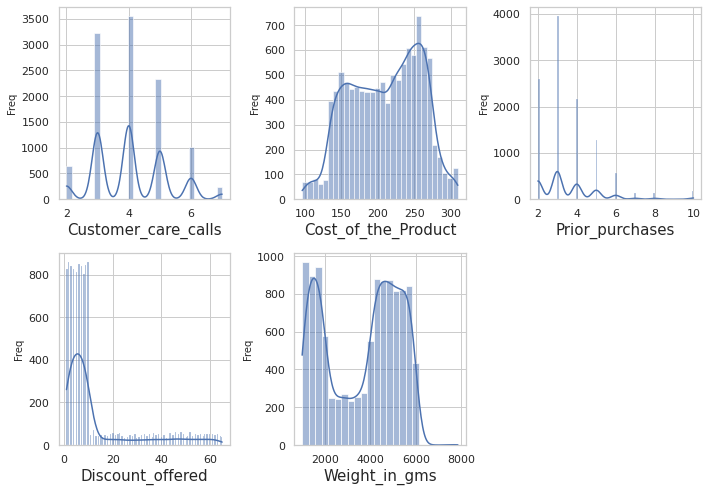

In [ ]:
for i in range(len(num)):
    plt.subplot(len(num)//2, 3, i+1)
    ax = sns.histplot(
        x = df[num[i]],
        kde = True
    )
    ax.set_xlabel(num[i], fontsize = 15)
    ax.set_ylabel("Freq", fontsize = 10)
plt.tight_layout()

**Observasi :**
1. **discount_offered dan prior_purchases** memiliki distribusi skew.
2. **weight_in_gms dan cost_of_the_product** memiliki distribusi bimodal.
3. **customer_care_calls** memiliki distribusi normal.

### 2) Melihat boxplot untuk outlier

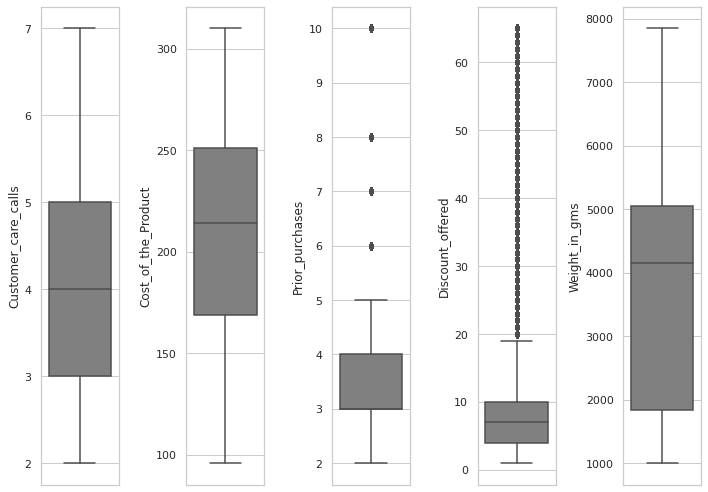

In [ ]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='gray', orient='v')
    plt.tight_layout()

**Observasi :**
Semua data pada categori numerical memiliki distribusi normal tanpa outlier, kecuali **prior_purchases dan discount_offered**

## <i> C. Distribusi Kolom Categorical

### 1) Melihat persebaran kolom categorical

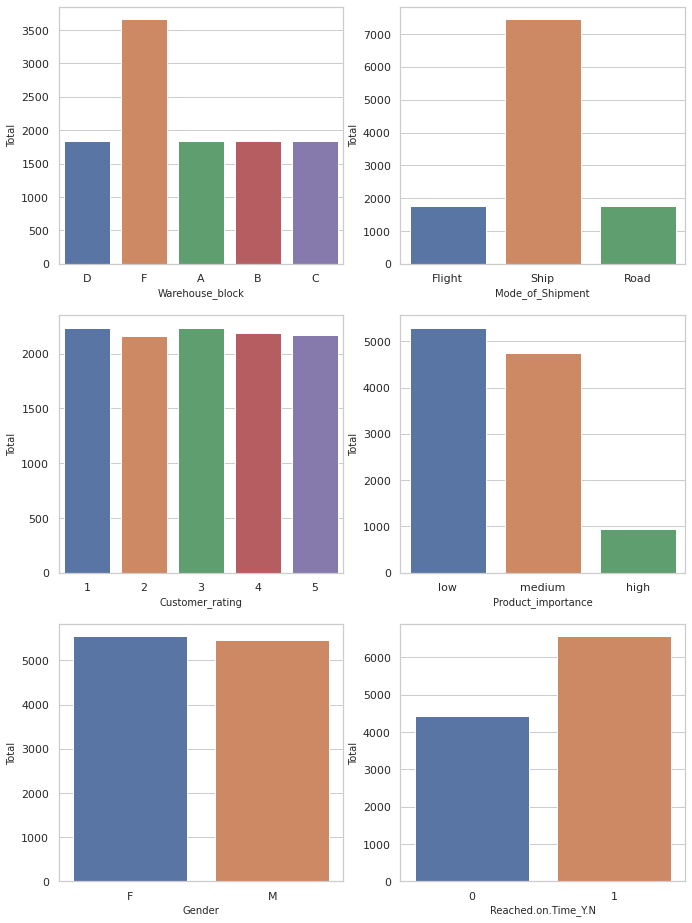

In [ ]:
c = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
plt.figure(figsize=(10, 15))
for i in range(len(c)):
    plt.subplot(len(c)//2, 2, i+1)
    ax = sns.countplot(
        x = df[c[i]],
    )
    ax.set_xlabel(c[i], fontsize = 10)
    ax.set_ylabel("Total", fontsize = 10)
plt.show()

**Observasi :**
1. Warehouse **F** memiliki tingkat kesibukan paling besar daripada warehouse lainnya.
2. Mode pengiriman jalur laut memiliki tingkat keterpilihan yang besar dibanding mode pengiriman lainnya.
3. Rating hampir tersebar secara merata.
4. Tingkat kepentingan produk yang banyak adalah **low** artinya barang tersebut banyak yang tidak urgent.
5. Perempuan lebih mendominasi ketimbang Laki-laki.
6. Pengiriman belum optimal dibuktikan tingkat keterlambatan yang jauh dari ketepatan waktu.

### 2) Melihat persentase kolom categorical vs target (keterlambatan)

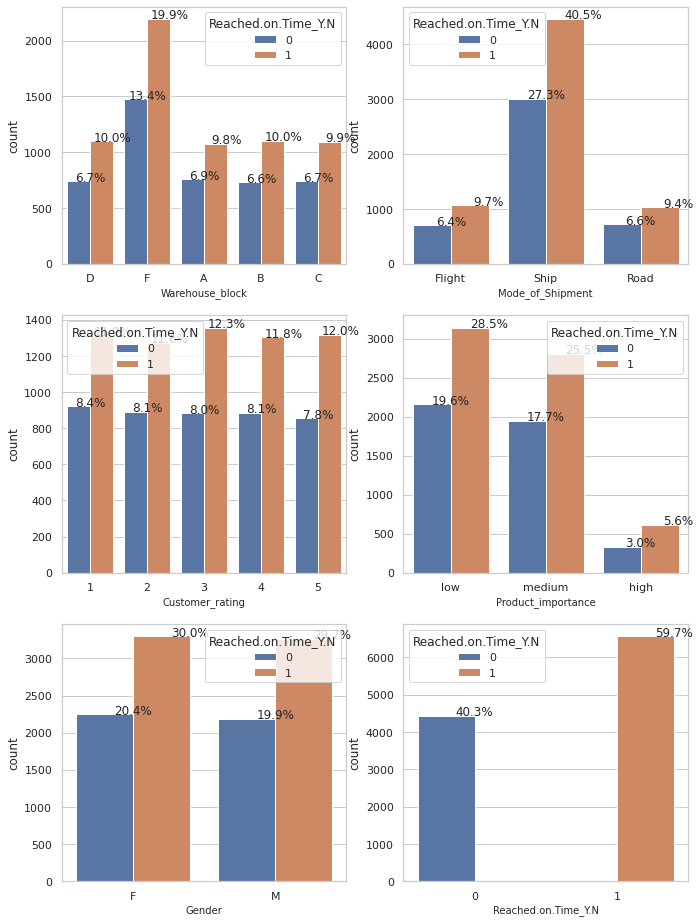

In [ ]:
plt.figure(figsize=(10, 15))
for i in range(len(c)):
    plt.subplot(len(c)//2, 2, i+1)
    total = float(len(df))
    ax = sns.countplot(
        x = df[c[i]], data=df, hue='Reached.on.Time_Y.N'
    )
    ax.set_xlabel(c[i], fontsize = 10)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Observasi :**

Secara keseluruhan tingkat keterlambatan memiliki persebaran terbanyak terhadap seluruh data categorical.

# <b> 4. MULTIVARIATE ANALYSIS

## <i> A. Korelasi

In [ ]:
df.corr()

Customer_care_calls  Cost_of_the_Product  \
Customer_care_calls             1.000000             0.323182   
Cost_of_the_Product             0.323182             1.000000   
Prior_purchases                 0.180771             0.123676   
Discount_offered               -0.130750            -0.138312   
Weight_in_gms                  -0.276615            -0.132604   

                     Prior_purchases  Discount_offered  Weight_in_gms  
Customer_care_calls         0.180771         -0.130750      -0.276615  
Cost_of_the_Product         0.123676         -0.138312      -0.132604  
Prior_purchases             1.000000         -0.082769      -0.168213  
Discount_offered           -0.082769          1.000000      -0.376067  
Weight_in_gms              -0.168213         -0.376067       1.000000

## <i> B. Heatmap

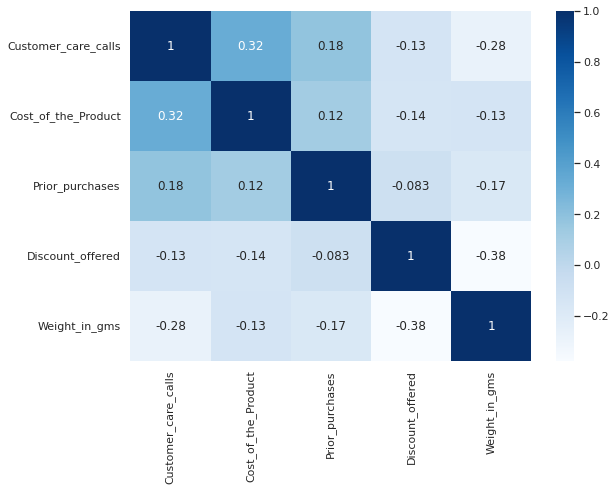

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

Tidak ada multicollinearity

## <I> C. Pair Plots

<Figure size 1080x1080 with 0 Axes>

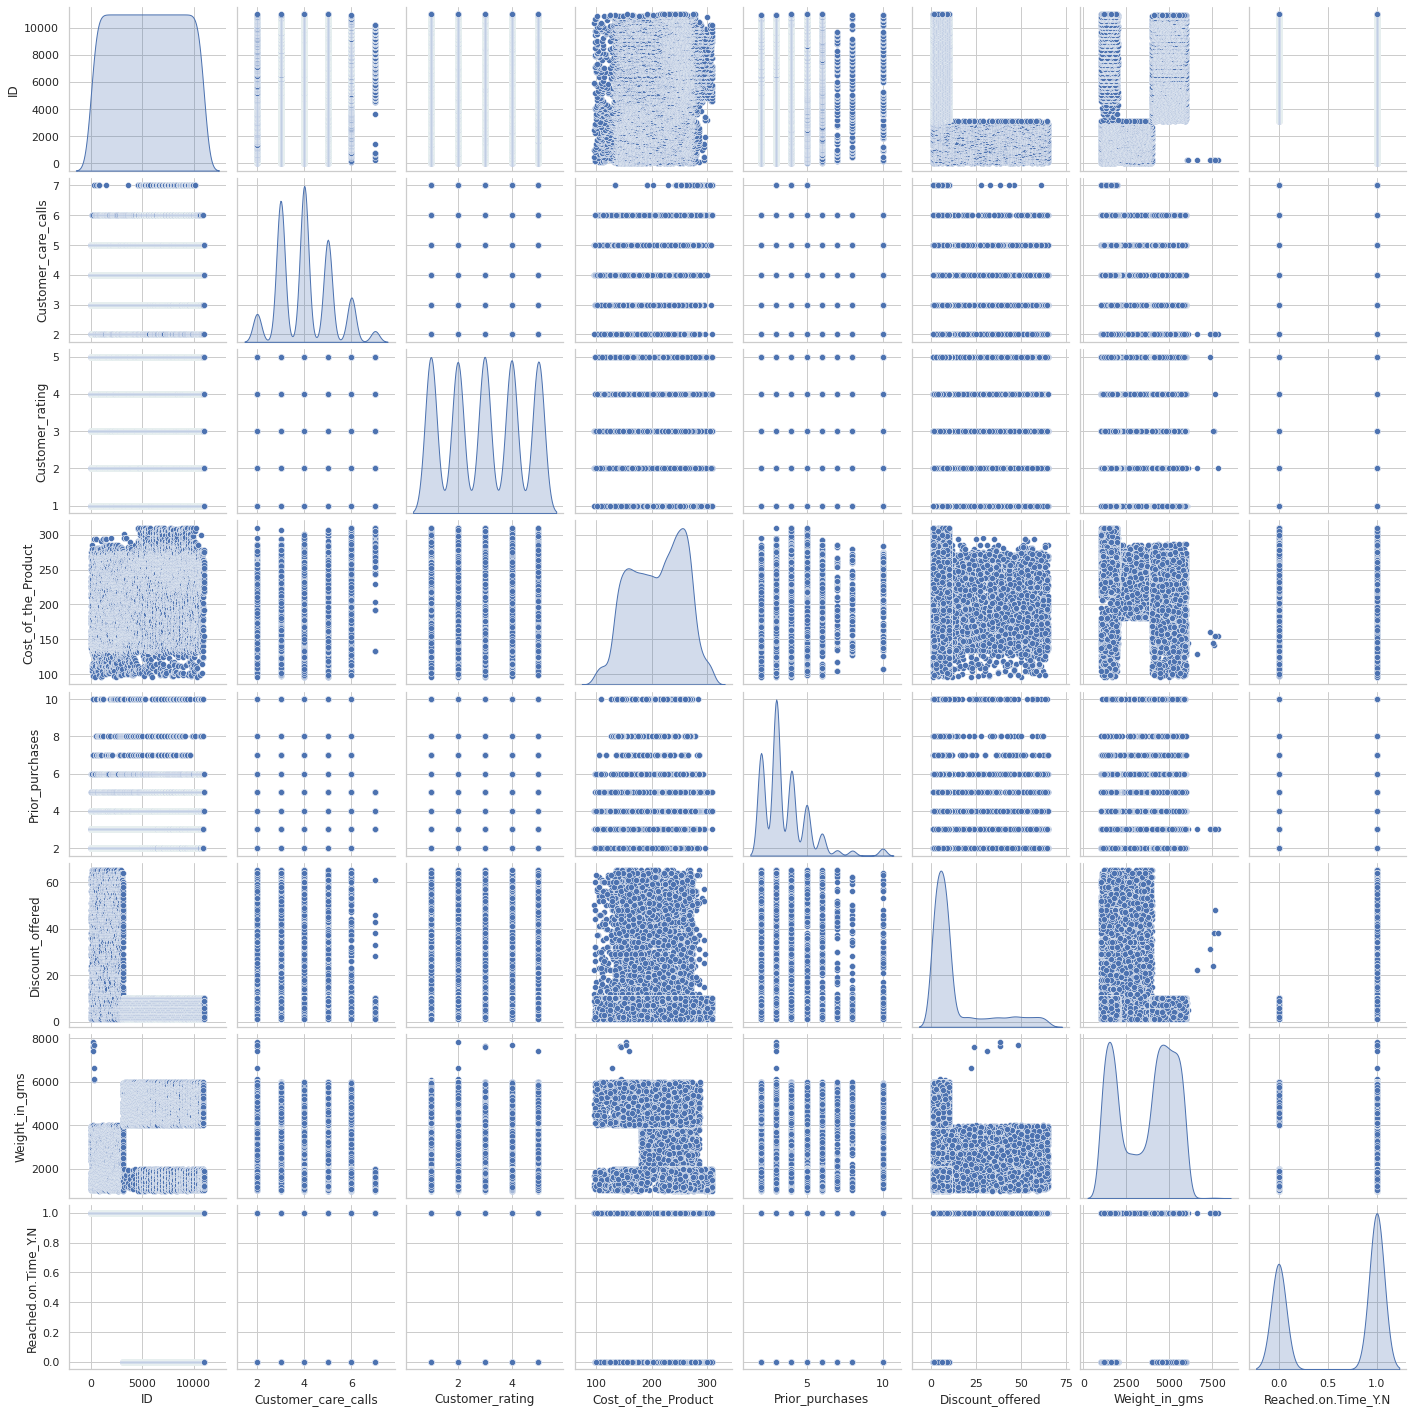

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.show()

Ada beberapa pattern yang jelas yaitu : **ID, Weight,Cost of the product, dan diskon**

<Figure size 1080x1080 with 0 Axes>

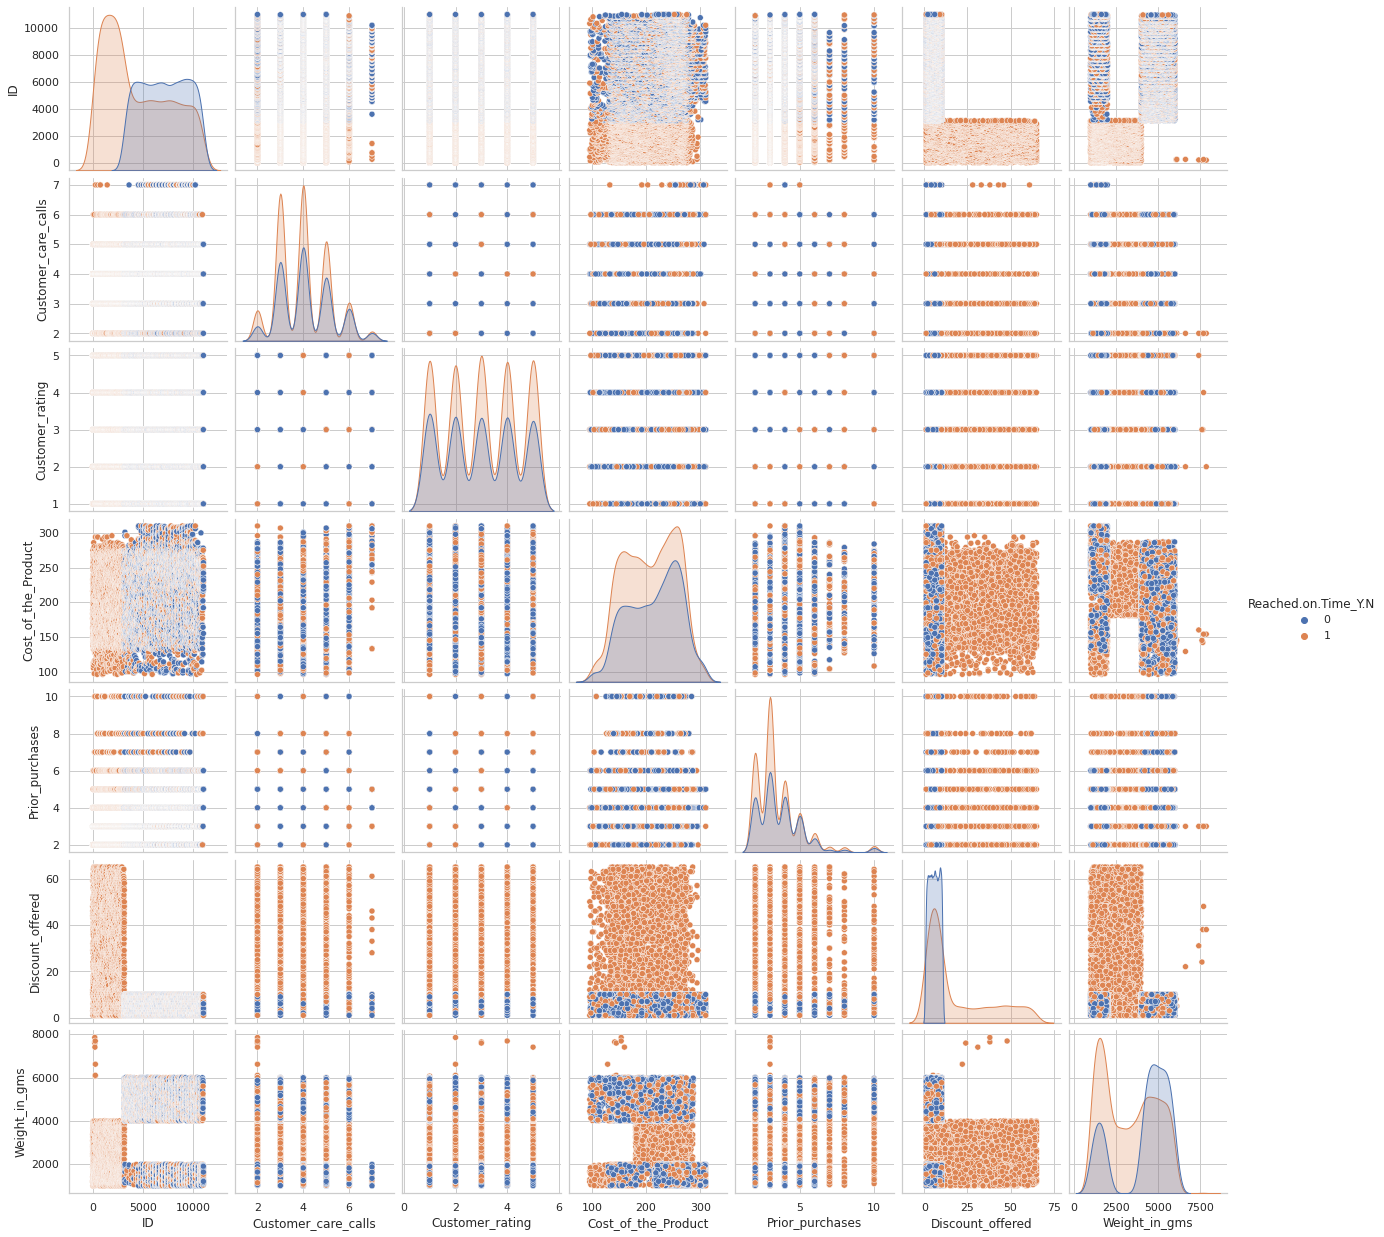

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='Reached.on.Time_Y.N')
plt.show()

**Interpretasi :**
1. Pemberian diskon lebih dari 10% sangat dominan mengalami keterlambatan dan terjadi pada barang dengan berat 2-4kg.
2. Harga produk 175-275 USD sangat dominan mengalami keterlambatan.

In [ ]:
cat = ['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

## <i> D. Category Plots

### 1) Melihat data category-numerical vs Target

#### a) Warehouse_block

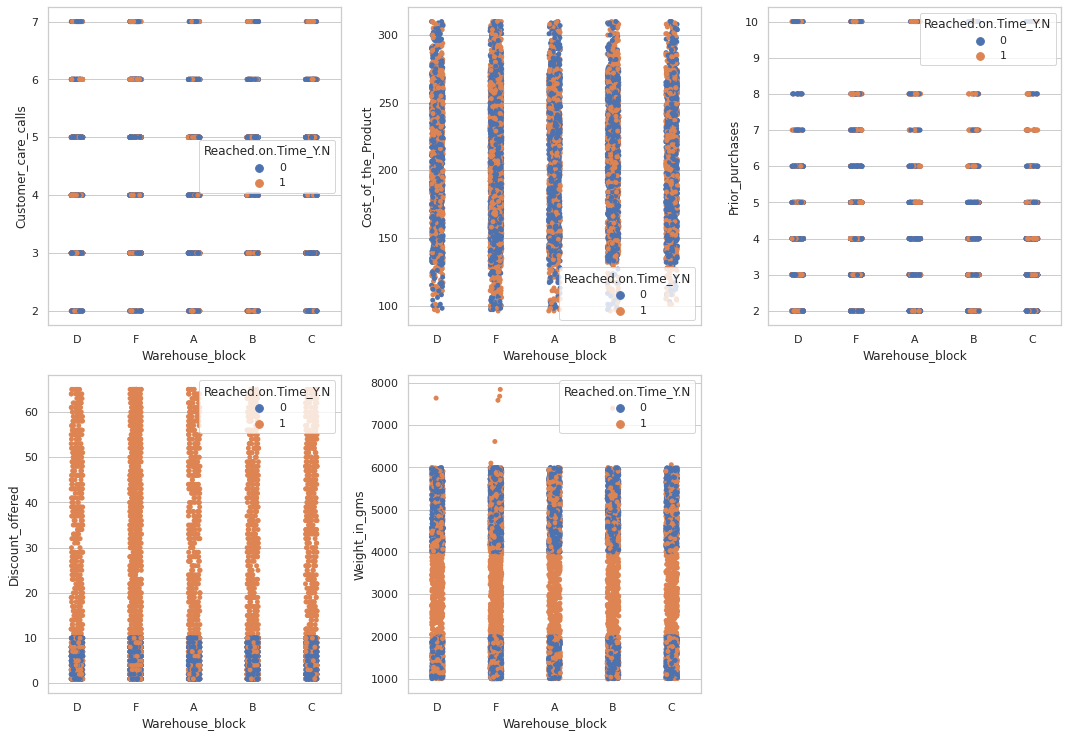

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Warehouse_block', y=num[i], hue='Reached.on.Time_Y.N') # gambar catplot/stripplotnya
    plt.tight_layout()

**Insight :** Setiap blok warehouse terlambat dengan diskon lebih dari 10% dan berat 2-4kg.

#### b) Mode_of_Shipment

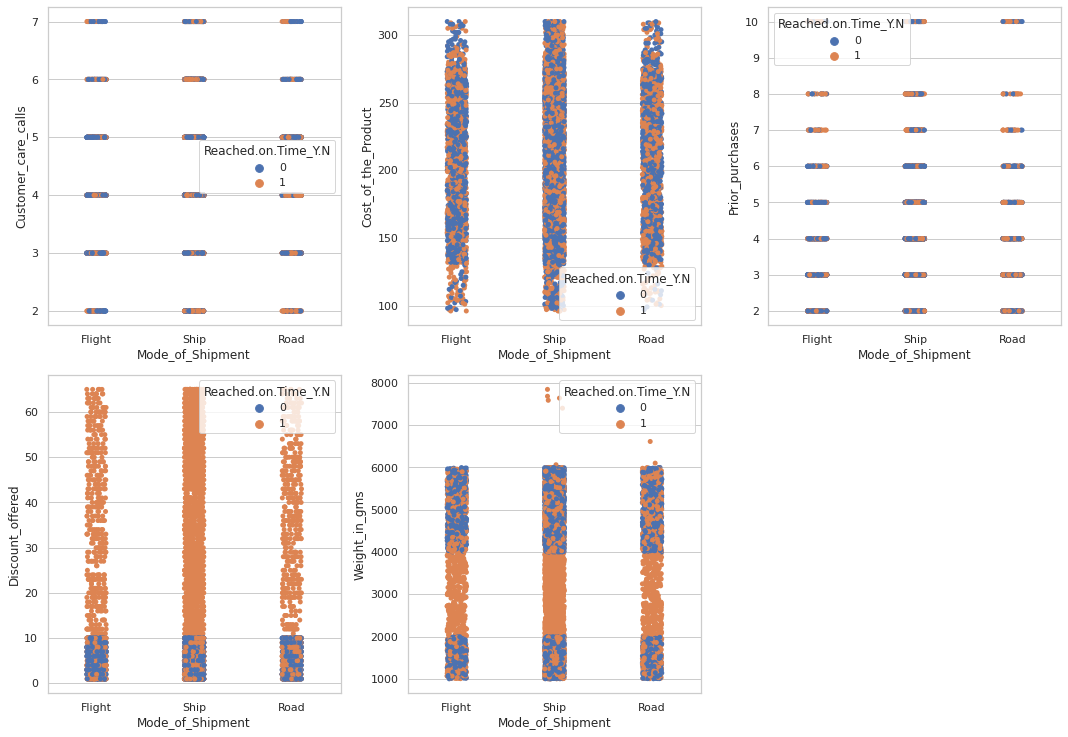

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Mode_of_Shipment', y=num[i], hue='Reached.on.Time_Y.N') # gambar catplot/stripplotnya
    plt.tight_layout()

**Insight :**  Setiap mode pengiriman mengalami keterlambatan dengan diskon lebih dari 10% dan berat 2-4kg.

#### c) Product_importance

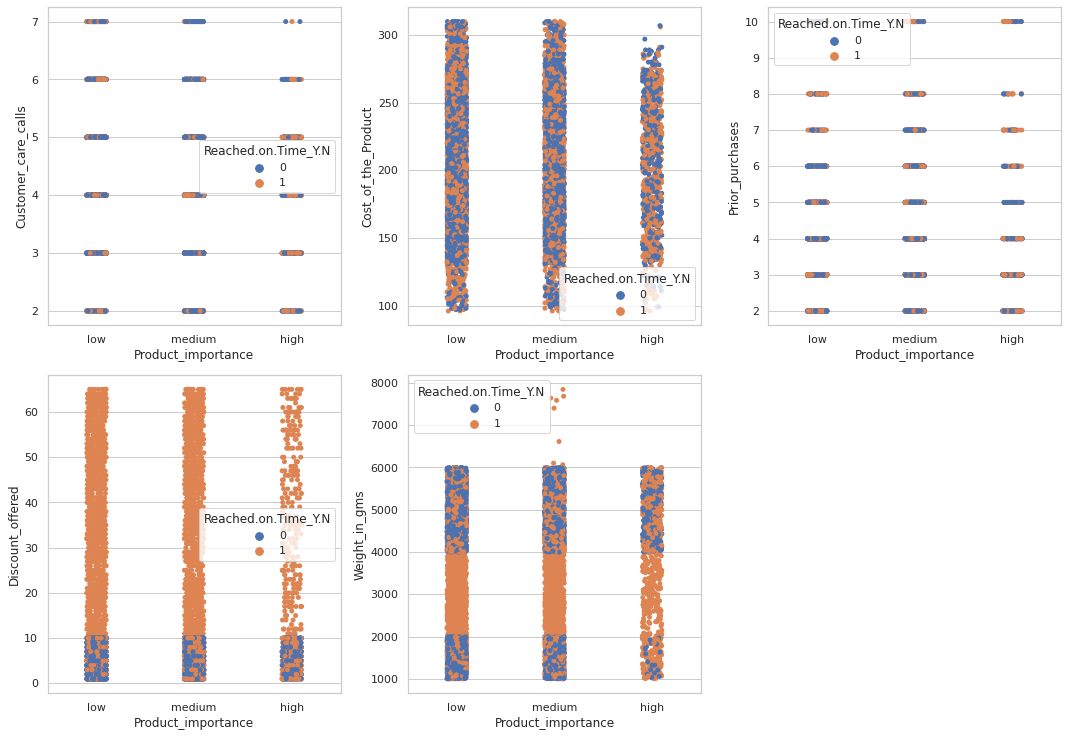

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Product_importance', y=num[i], hue='Reached.on.Time_Y.N') # gambar catplot/stripplotnya
    plt.tight_layout()

**Insight :** Setiap produk_importance mengalami keterlambatan dengan diskon lebih dari 10% dan berat 2-4kg.

#### d) Gender

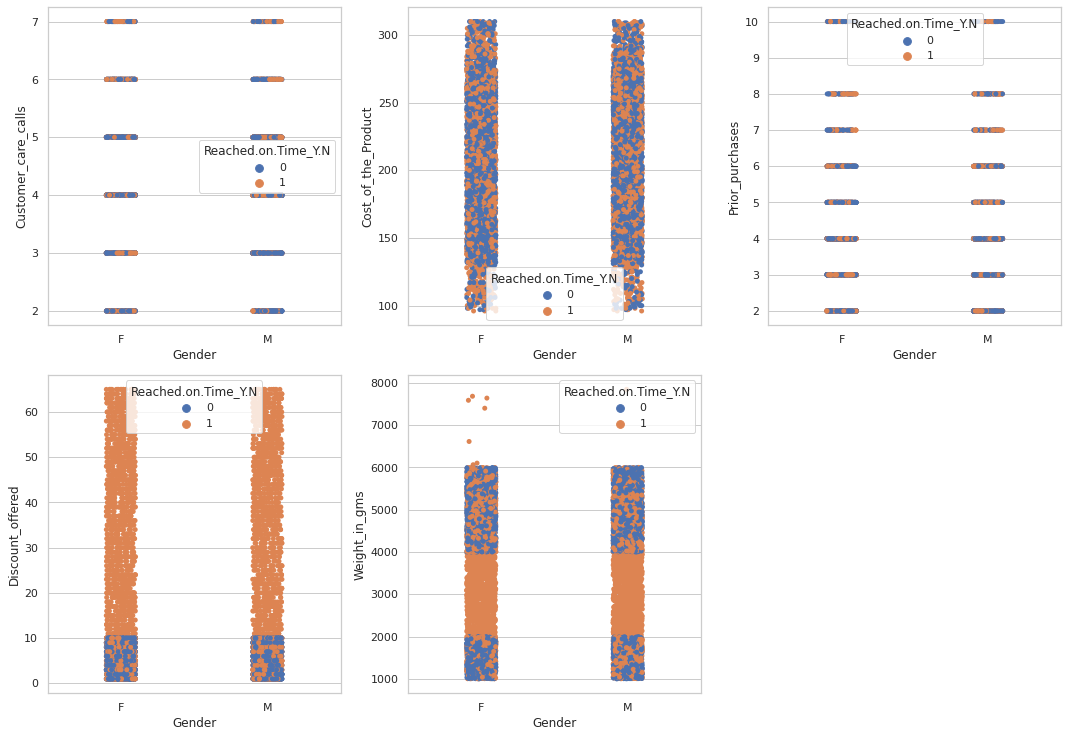

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Gender', y=num[i], hue='Reached.on.Time_Y.N') # gambar catplot/stripplotnya
    plt.tight_layout()

# <B> 5. BUSINESS INSIGHT

## <i> A Insight

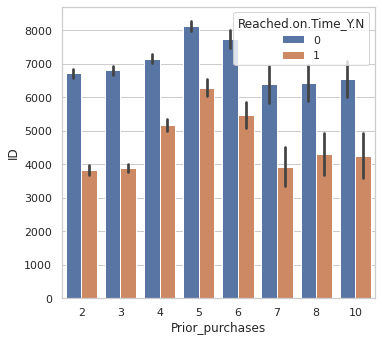

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(data=df,x=df['Prior_purchases'],y=df['ID'],hue=df['Reached.on.Time_Y.N'])
plt.show()

Pelanggan awal membeli barang sampai 10x namun hasilnya tetap terlambat.

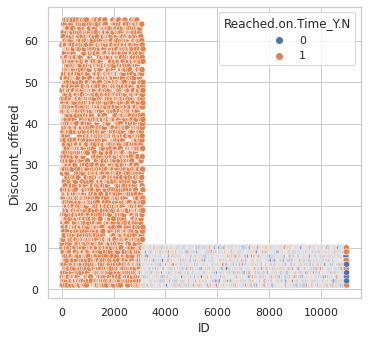

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df,x=df['ID'],y=df['Discount_offered'],hue=df['Reached.on.Time_Y.N'])
plt.show()

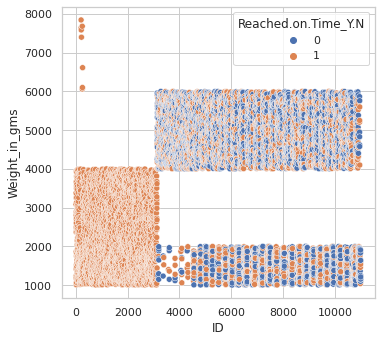

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df,x=df['ID'],y=df['Weight_in_gms'],hue=df['Reached.on.Time_Y.N'])
plt.show()

Berat barang 1-4 kg mengalami keterlambatan pada 3.000 pelanggan pertama.

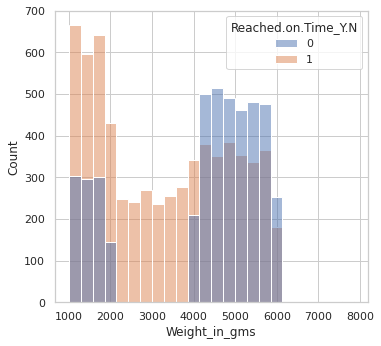

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df,x=df['Weight_in_gms'],hue=df['Reached.on.Time_Y.N'])
plt.show()

Seluruh barang dengan berat 2-4 kg **pasti** terlambat.

## <i> B. Kesimpulan EDA

- ID 3.000 awal dan berat antara 2-4kg mengalami keterlambatan.

## <i> C. Rekomendasi Bisnis

- Pemberian penambahan estimasi waktu yang diberikan
- Dilakukan Audit terhadap ID dan berat untuk 3.000 ID awal dan berat antara 2-4kg

# <B> 6. DATA PREPROCESSING

## <i> A. Handle Missing Values

Tidak dilakukan karena pada dataset **tidak ada nilai yang kosong**.

## <i> B. Handle Duplicated Data

Tidak dilakukan karena pada dataset **tidak ada nilai duplikat.**

## <i> C. Feature Extraction


### Category_loyalty

In [ ]:
df['Category_loyalty'] = np.where(df['Prior_purchases'] < 4, 'Silver',
                                  np.where(df['Prior_purchases'] > 6, 'Platinum', 'Gold'))

### Category_cost_of_the_product

In [ ]:
df['Category_cost_of_the_product'] = np.where(df['Cost_of_the_Product'] < 170, 'Cheap',
                                              np.where(df['Cost_of_the_Product'] > 251, 'Expensive', 'Standard'))

## <i> D. Label Encoding


#### Product Importance

In [ ]:
mapping_product_importance = {
    'low': 1,
    'medium': 2,
    'high': 3
}
df['Product_importance'] = df['Product_importance'].map(mapping_product_importance)
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls Customer_rating  \
0  1               D           Flight                    4               2   
1  2               F           Flight                    4               5   
2  3               A           Flight                    2               2   
3  4               B           Flight                    3               3   
4  5               C           Flight                    2               2   

   Cost_of_the_Product  Prior_purchases  Product_importance Gender  \
0                  177                3                   1      F   
1                  216                2                   1      M   
2                  183                4                   1      M   
3                  176                4                   2      M   
4                  184                3                   2      F   

   Discount_offered  Weight_in_gms Reached.on.Time_Y.N Category_loyalty  \
0                44           1233                   1           Silver   
1                59           3088                   1           Silver   
2                48           3374                   1             Gold   
3                10           1177                   1             Gold   
4                46           2484                   1           Silver   

  Category_cost_of_the_product  
0                     Standard  
1                     Standard  
2                     Standard  
3                     Standard  
4                     Standard

In [ ]:
mapping_Category_loyalty = {
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}
df['Category_loyalty'] = df['Category_loyalty'].map(mapping_Category_loyalty)
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls Customer_rating  \
0  1               D           Flight                    4               2   
1  2               F           Flight                    4               5   
2  3               A           Flight                    2               2   
3  4               B           Flight                    3               3   
4  5               C           Flight                    2               2   

   Cost_of_the_Product  Prior_purchases  Product_importance Gender  \
0                  177                3                   1      F   
1                  216                2                   1      M   
2                  183                4                   1      M   
3                  176                4                   2      M   
4                  184                3                   2      F   

   Discount_offered  Weight_in_gms Reached.on.Time_Y.N  Category_loyalty  \
0                44           1233                   1                 1   
1                59           3088                   1                 1   
2                48           3374                   1                 2   
3                10           1177                   1                 2   
4                46           2484                   1                 1   

  Category_cost_of_the_product  
0                     Standard  
1                     Standard  
2                     Standard  
3                     Standard  
4                     Standard

In [ ]:
mapping_Category_cost_of_the_product = {
    'Cheap': 1,
    'Standard': 2,
    'Expensive': 3
}
df['Category_cost_of_the_product'] = df['Category_cost_of_the_product'].map(mapping_Category_cost_of_the_product)
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls Customer_rating  \
0  1               D           Flight                    4               2   
1  2               F           Flight                    4               5   
2  3               A           Flight                    2               2   
3  4               B           Flight                    3               3   
4  5               C           Flight                    2               2   

   Cost_of_the_Product  Prior_purchases  Product_importance Gender  \
0                  177                3                   1      F   
1                  216                2                   1      M   
2                  183                4                   1      M   
3                  176                4                   2      M   
4                  184                3                   2      F   

   Discount_offered  Weight_in_gms Reached.on.Time_Y.N  Category_loyalty  \
0                44           1233                   1                 1   
1                59           3088                   1                 1   
2                48           3374                   1                 2   
3                10           1177                   1                 2   
4                46           2484                   1                 1   

   Category_cost_of_the_product  
0                             2  
1                             2  
2                             2  
3                             2  
4                             2

### One-hot Encoding

One-hot Encoding dilakukan pada feature warehouse block, mode of shipement, dan gender dikarenakan feature-feature tersebut merupakan tipe data categorical

#### warehouse block

In [ ]:
warehouse = pd.get_dummies(df['Warehouse_block'], prefix='Warehouse')
df = pd.concat([warehouse,df], axis=1)

#### mode of shipment

In [ ]:
shipment = pd.get_dummies(df['Mode_of_Shipment'], prefix='Shipment')
df = pd.concat([shipment,df], axis=1)

## <i> E. Feature Selection

In [ ]:
# drop kolom kategori yang sudah di encoding dan klom yang tidak digunakan dalam pemodelan [ID,Gender,Customer_rating]
df_new = df.drop(columns=['Product_importance','Warehouse_block','Mode_of_Shipment','Prior_purchases','Cost_of_the_Product', 'ID','Gender', 'Customer_rating'])



In [ ]:
df_new.head()

Shipment_Flight  Shipment_Road  Shipment_Ship  Warehouse_A  Warehouse_B  \
0                1              0              0            0            0   
1                1              0              0            0            0   
2                1              0              0            1            0   
3                1              0              0            0            1   
4                1              0              0            0            0   

   Warehouse_C  Warehouse_D  Warehouse_F  Customer_care_calls  \
0            0            1            0                    4   
1            0            0            1                    4   
2            0            0            0                    2   
3            0            0            0                    3   
4            1            0            0                    2   

   Discount_offered  Weight_in_gms Reached.on.Time_Y.N  Category_loyalty  \
0                44           1233                   1                 1   
1                59           3088                   1                 1   
2                48           3374                   1                 2   
3                10           1177                   1                 2   
4                46           2484                   1                 1   

   Category_cost_of_the_product  
0                             2  
1                             2  
2                             2  
3                             2  
4                             2

In [ ]:
df_new['Reached.on.Time_Y.N']=df_new['Reached.on.Time_Y.N'].astype(int)
#df_new['Customer_rating']=df_new['Customer_rating'].astype(np.int)

### Class Distribution

In [ ]:

X = df_new.drop(['Reached.on.Time_Y.N'],axis=1)
y = df_new['Reached.on.Time_Y.N']

In [ ]:
y.value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

<AxesSubplot:ylabel='Reached.on.Time_Y.N'>

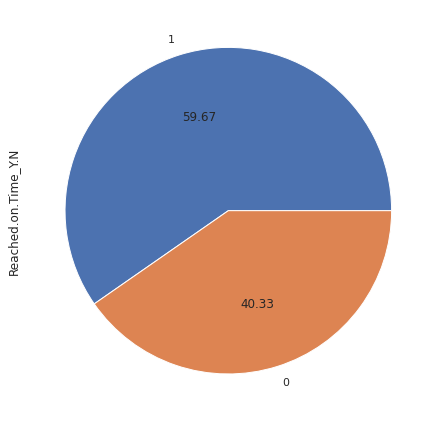

In [ ]:
# show pie plot
y.value_counts().plot.pie(autopct='%.2f')

### SMOTE Oversampling

In [ ]:
from imblearn import under_sampling, over_sampling
# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

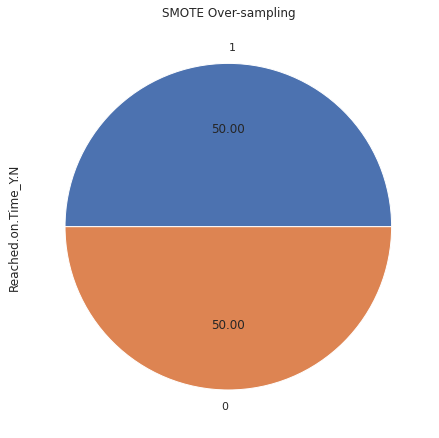

In [ ]:
ax = y_over_smote.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title('SMOTE Over-sampling')

In [ ]:
y_over_smote.value_counts()

1    6563
0    6563
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
oversampling_smote = pd.concat([X_over_smote, y_over_smote], axis=1)

In [ ]:
databaseline = oversampling_smote

## <i> F. Spliting Data

In [ ]:
# split train test
X = databaseline.drop(columns='Reached.on.Time_Y.N')
y = databaseline[['Reached.on.Time_Y.N']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
train = pd.concat([X_train, y_train], axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10500 entries, 7770 to 7270
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Shipment_Flight               10500 non-null  uint8
 1   Shipment_Road                 10500 non-null  uint8
 2   Shipment_Ship                 10500 non-null  uint8
 3   Warehouse_A                   10500 non-null  uint8
 4   Warehouse_B                   10500 non-null  uint8
 5   Warehouse_C                   10500 non-null  uint8
 6   Warehouse_D                   10500 non-null  uint8
 7   Warehouse_F                   10500 non-null  uint8
 8   Customer_care_calls           10500 non-null  int64
 9   Discount_offered              10500 non-null  int64
 10  Weight_in_gms                 10500 non-null  int64
 11  Category_loyalty              10500 non-null  int64
 12  Category_cost_of_the_product  10500 non-null  int64
 13  Reached.on.Time_Y.N          

## <i> G. Outliers

Outlier **tidak di handle** karena akan fokus menggunakan model yang robust terhadap outlier.

## <i> H. Feature transformation

#### Log Tranformation

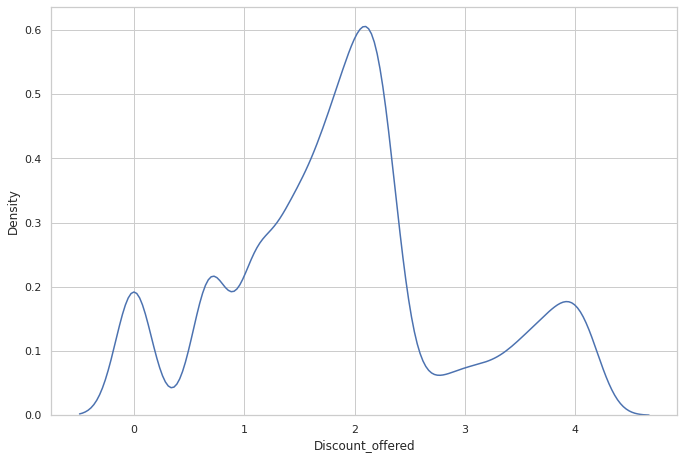

In [ ]:
#distribusi 'Discount_offered' setelah lof transformation
sns.kdeplot(np.log(train['Discount_offered']))
train['log_discount'] = np.log(train['Discount_offered'])

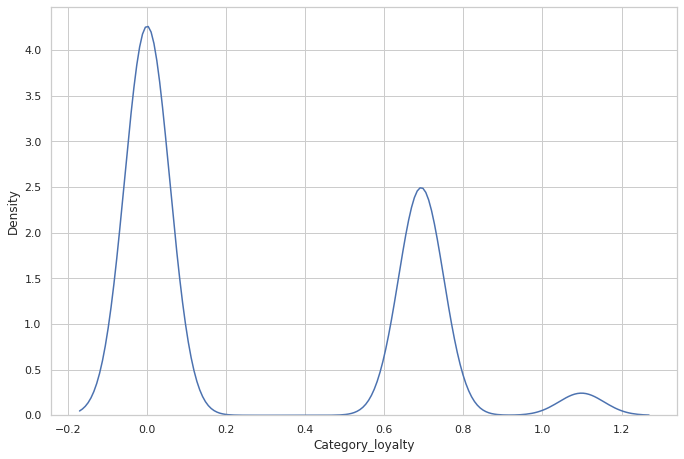

In [ ]:
#distribusi 'Prior_purchases' setelah lof transformation
sns.kdeplot(np.log(train['Category_loyalty']))
train['log_Category_loyalty'] = np.log(train['Category_loyalty'])

berdasarkan hasil distribusi dari normalization, stadardization, dan log tranformation, bentuk yang mendekati distribusi normal adalah log transformation.

In [ ]:
train['Discount_offered']=train['log_discount'] 

In [ ]:
train['Category_loyalty']=train['log_Category_loyalty']

In [ ]:
# drop kolom kategori yang sudah di encoding
train = train.drop(columns=['log_discount','log_Category_loyalty'])

Dikarenakan distribusi data pada Discount_offered dan Prior_purchases (Category_loyalty)  masih right skewed, maka akan dilakukan feature transformation dengan membandingkan normalization, standarization dan log transformation. Dari ketiga feature tranformation tersebut dipilih salah satu yang bentuk distribusi datanya mendekati distribusi normal

# Stage 3 Machine Learning

## Model Evaluation

### Import Library For Model Evaluation

In [ ]:
# Import Library

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate

# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Preparation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # 
    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

##Fit Model

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() #inisiasi dengan nama logreg
logreg.fit(X_train, y_train) #fit model logistic regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.70
Recall (Test Set): 0.66
F1-Score (Test Set): 0.68
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.80
roc_auc (crossval train): 0.9999975369681016
roc_auc (crossval test): 0.8569488700698015


In [ ]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.77
Recall (Test Set): 0.53
F1-Score (Test Set): 0.63
roc_auc (test-proba): 0.72
roc_auc (train-proba): 0.72
roc_auc (crossval train): 0.9999972104900007
roc_auc (crossval test): 0.8585588360718924


#### Learning curve

param value: 0.0001; train: 0.7293173760113221; test: 0.7246222964722534
param value: 0.0006040404040404041; train: 0.7238997852004083; test: 0.7224667252545819
param value: 0.0011080808080808082; train: 0.7376138487904336; test: 0.7336396147119475
param value: 0.0016121212121212123; train: 0.7419872648411773; test: 0.7373689385435973
param value: 0.002116161616161616; train: 0.7456162256485602; test: 0.7405431273765086
param value: 0.0026202020202020205; train: 0.7226012425026582; test: 0.7219684379359651
param value: 0.0031242424242424243; train: 0.753046809795767; test: 0.7470231828320005
param value: 0.003628282828282828; train: 0.7591603840821617; test: 0.7547997134412858
param value: 0.004132323232323233; train: 0.754926904864287; test: 0.7509404520550726
param value: 0.004636363636363637; train: 0.7224003531473053; test: 0.7218889671994686
param value: 0.0051404040404040416; train: 0.7223724891370269; test: 0.7218924476696802
param value: 0.005644444444444445; train: 0.722352897

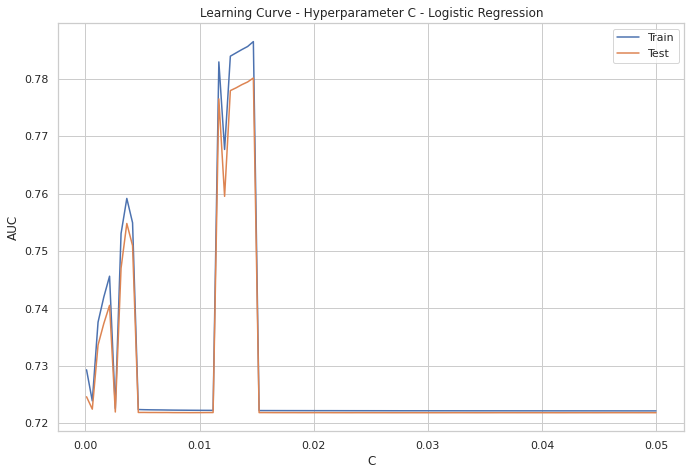

In [ ]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

###K-Nearest Neigbor (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier() # inisiasi dengan nama knn
knn.fit(X_train, y_train) # fit model kNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.72
Precision (Test Set): 0.77
Recall (Test Set): 0.62
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.78
roc_auc (train-proba): 0.89
roc_auc (crossval train): 0.9999983495048346
roc_auc (crossval test): 0.8578742985786528


In [ ]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.78
Recall (Test Set): 0.63
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.94
roc_auc (crossval train): 0.9999961803035033
roc_auc (crossval test): 0.8562915402042556


#### Learning curve


param value: 1; train: 0.9994288603518209; test: 0.7403380696732129
param value: 2; train: 0.9642855225133221; test: 0.7870442396767804
param value: 3; train: 0.9355113604617531; test: 0.7898274556892637
param value: 4; train: 0.9091268819635536; test: 0.7861343867556507
param value: 5; train: 0.8924899997953736; test: 0.7843944416890722
param value: 6; train: 0.8786118904729611; test: 0.7831417624521073
param value: 7; train: 0.8676802369717973; test: 0.77806027594328
param value: 8; train: 0.8598673027304262; test: 0.7772858713212155
param value: 9; train: 0.8504745008750315; test: 0.7698776904759833
param value: 10; train: 0.843859174856678; test: 0.7658626780478043
param value: 11; train: 0.837507141966697; test: 0.7624341248502673
param value: 12; train: 0.8332318667334049; test: 0.7587184328602795
param value: 13; train: 0.827869641130414; test: 0.7583605245068609
param value: 14; train: 0.8242080997485127; test: 0.7572766480751552
param value: 15; train: 0.8206976335473396; test

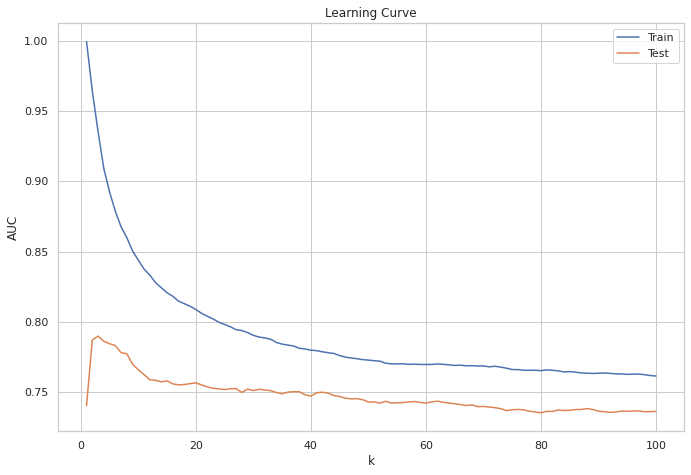

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.69
Recall (Test Set): 0.71
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.70
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999985018664408
roc_auc (crossval test): 0.8564208313798268


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='roc_auc')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.74
Recall (Test Set): 0.62
F1-Score (Test Set): 0.67
roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.87
roc_auc (crossval train): 0.9999980520240396
roc_auc (crossval test): 0.8577519362969135


#Ensemble Method

## Bagging: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.72
Precision (Test Set): 0.73
Recall (Test Set): 0.69
F1-Score (Test Set): 0.71
roc_auc (test-proba): 0.82
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999978489254395
roc_auc (crossval test): 0.8567947764244501


karena masih  masih terlihat isu overfittng jadi, harus mencoba untuk tuning dengan menggunakan hyperparameter

In [ ]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.88
Recall (Test Set): 0.56
F1-Score (Test Set): 0.68
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.90
roc_auc (crossval train): 0.9999970073651451
roc_auc (crossval test): 0.8566033523638426


walaupun di tuning masih tetap overfitting. Diperlukan grafik untuk melihat bagaimana model kita telah belajar yang akan ditunjukan dengan Learning curve

#### Learning Curve

param value: 2; train: 0.992122702797387; test: 0.8228452263900853
param value: 3; train: 0.9754229270591322; test: 0.8223715924021335
param value: 4; train: 0.9605867928364532; test: 0.8222642779039449
param value: 5; train: 0.9479888678925188; test: 0.8205907518105696
param value: 7; train: 0.9305022059733762; test: 0.8218660541039094
param value: 8; train: 0.9233052550217259; test: 0.8200425777522542
param value: 9; train: 0.915429009975751; test: 0.8199210513340351
param value: 11; train: 0.9073327009267251; test: 0.824592132397087
param value: 12; train: 0.9029160194693967; test: 0.821453038305475
param value: 13; train: 0.8986245809332674; test: 0.8181915476780912
param value: 14; train: 0.8949330893684433; test: 0.8218973783358132
param value: 16; train: 0.8898923883215548; test: 0.8176456939332504
param value: 17; train: 0.8863012144499856; test: 0.820306803449146
param value: 18; train: 0.8839399754071084; test: 0.8209947763942909
param value: 20; train: 0.8789666305256908; te

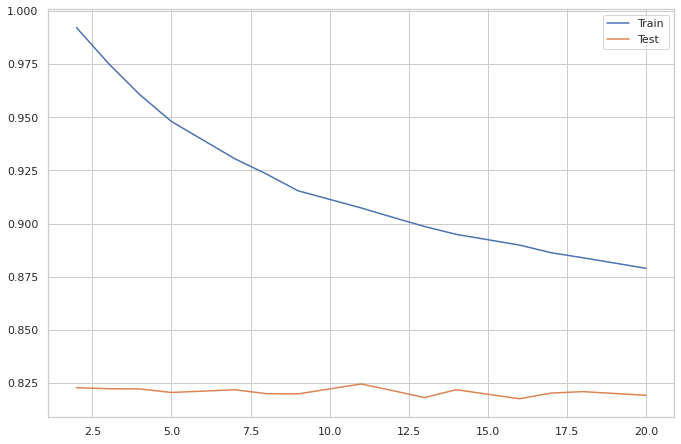

In [ ]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

## Boosting: Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
eval_classification(clf)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.89
Recall (Test Set): 0.93
F1-Score (Test Set): 0.91
roc_auc (test-proba): 0.97
roc_auc (train-proba): 0.99
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9831990529052905


In [ ]:
#tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.91
Recall (Test Set): 0.93
F1-Score (Test Set): 0.92
roc_auc (test-proba): 0.97
roc_auc (train-proba): 0.98
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9816688848884889


Setelah menggunakan boosting dg Adaboost dan di tuning, model memiliki hasil roc_auc di train (proba) dan test (proba) yang cukup bagus dan tidak overfitting 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import learning_curve
import numpy as np

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    ab, X, y, train_sizes=train_sizes, cv=5)

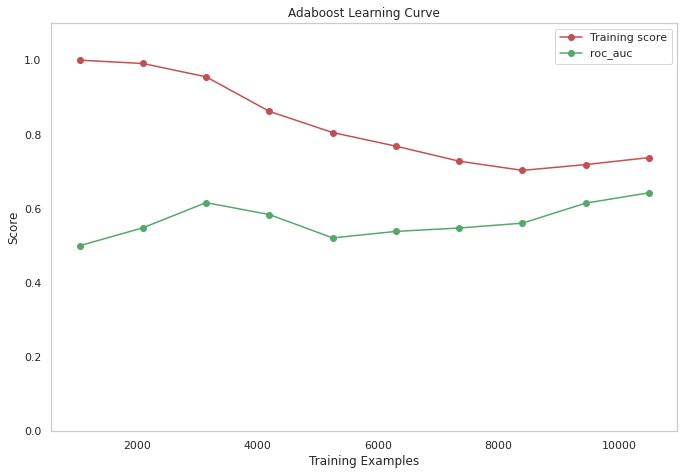

In [ ]:
plt.figure()
plt.title("Adaboost Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.grid()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",
         label="roc_auc")
plt.legend(loc="best")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(train_sizes, train_scores, test_scores):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.grid()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

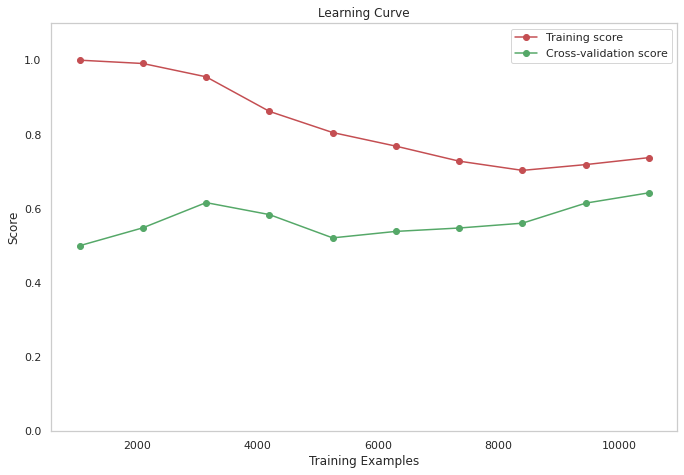

In [ ]:
plot_learning_curve(train_sizes, train_scores, test_scores)

In [ ]:
df_adaboost = df_new.drop(['Reached.on.Time_Y.N'], axis=1)
df_adaboost['Reached.on.Time_Y.N'] = ab_tuned.predict(df_adaboost)

<AxesSubplot:ylabel='Reached.on.Time_Y.N'>

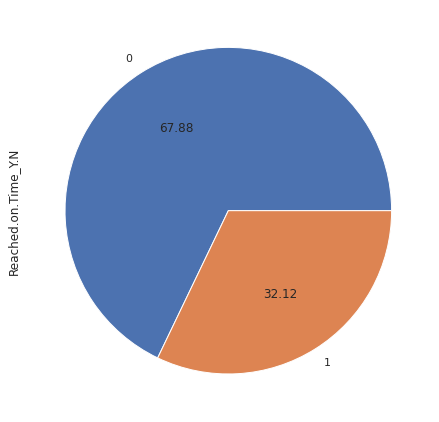

In [ ]:
# show pie plot
df_adaboost['Reached.on.Time_Y.N'].value_counts().plot.pie(autopct='%.2f')

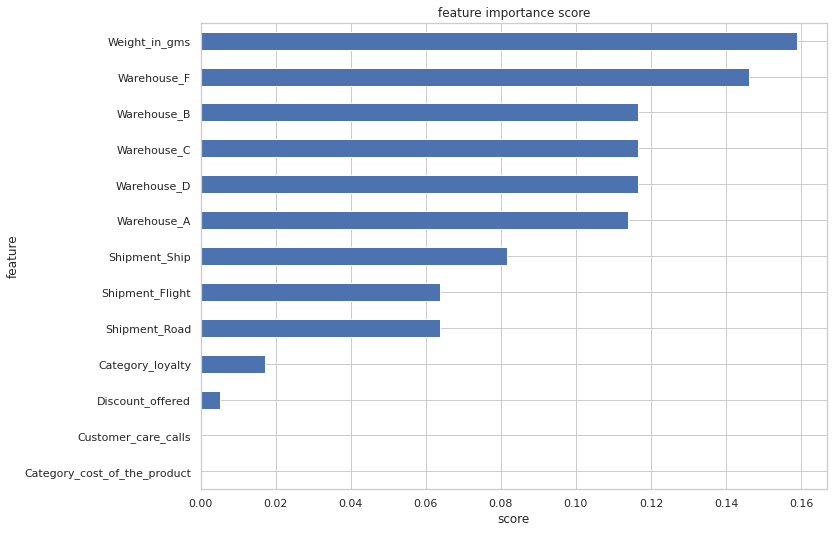

In [ ]:
show_feature_importance(ab_tuned.best_estimator_)

## Boosting: XGBoost

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.93
Recall (Test Set): 0.97
F1-Score (Test Set): 0.95
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.98135899989999


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#dijadikan ke dalam bentuk dictionary untuk mempermudah
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Initiasi
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.93
Recall (Test Set): 0.94
F1-Score (Test Set): 0.94
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9805589018901891


In [ ]:
# Step: Load the dataset and split into training and testing sets
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step: Define a list of train sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
# Step: Create an instance of the XGBoost classifier with desired hyperparameters
xgb_classifier = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)

# Step: Define a custom scoring function that calculates ROC AUC score
scoring = make_scorer(roc_auc_score)


# Step: Use the sklearn.model_selection.learning_curve function to generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(xgb_classifier, X_train, y_train, 
                                                        train_sizes=train_sizes, cv=5, 
                                                        scoring=scoring)





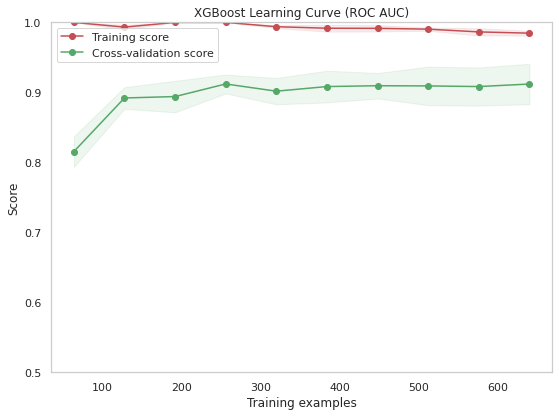

In [ ]:
# Step 7: Plot the learning curve data using matplotlib
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('XGBoost Learning Curve (ROC AUC)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.ylim(0.5, 1.0)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Cross-validation score')

plt.legend(loc='best')
plt.show()

## Simple Ensemble Method: Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

vote_model = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(C=4.281332398719396)), 
        ('knn', KNeighborsClassifier(algorithm='brute', leaf_size=48, n_neighbors=17, p=1)), 
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('ab', AdaBoostClassifier()),
        ('xg', XGBClassifier()),
    ], voting = 'soft')

vote_model.fit(X_train, y_train)
eval_classification(vote_model)

Accuracy (Test Set): 0.72
Precision (Test Set): 0.74
Recall (Test Set): 0.66
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.82
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999993216683919
roc_auc (crossval test): 0.8539090468178585


#Kesimpulan

## Evaluasi feature paling penting

Dengan menggunakan metric evaluasi ROC AUC dapat disimpulkan bahwa model adaboost meiliki score ROC AUC tertinggi dalam memprediksi keterlambatan pengiriman barang.

Setelah model adaboost dievaluasi, feature yang paling berpengaruh dalam memprediksi keterlambatan adalah Weight in gms, Warehouse, Mode of shipment 

## Business Insight




1. Warehouse F contributes 2x the percentage of late deliveries. 
This is presumably because the capacity of the warehouse is indeed large or because the warehouse is overloaded so the delivery management is not going well.

2. Overall the delay in delivery is by ship. In warehouse F, the shipping portion by ship is the highest 13.51%. 

## Rekomendasi


Utilizing fulfillment centers to help ecommerce businesses in managing order fulfillment operations

Employ freelancers to help operational process during discount season 

Drone deliveries for fast-moving goods and goods weighed less than 3kg with distance constrain

#*) 
karena masih terbatasnya kami dalam membuat visualisai data yang terlihat clear dengan code python, untuk kebutuhan Visualisasi data baik pada kebutuhan EDA dan Slide presentasi final project beberapa dibantu menggunakan tools Tableau.



